# Fase 4 - Data viz and production models

## Análise de negócios

### Aula 2 - Ligação com bancos de dados    	   


In [1]:
#Dados do site https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/serie-historica-de-precos-de-combustiveis

In [2]:
#pip install pandas

In [3]:
#Para o banco de dados
#pip install psycopg2

In [4]:
#Importando bibliotecas 
import pandas as pd
import pandas.io.sql as sqlio
import psycopg2 as ps

In [5]:
#chamando o banco de dados
conn = ps.connect(dbname = 'ANP',
                    user ='postgres',
                    password = 'admin',
                    host = 'localhost',
                    port = '5432' )

In [6]:
#usamos esse comando no sql para visualizar a tabela
sql = """
SELECT * FROM anp.preco_combustivel
"""

In [7]:
#chamando a tabela
df = sqlio.read_sql_query(sql, conn)

C:\Users\aila.endo\AppData\Local\Temp\ipykernel_11572\591533055.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = sqlio.read_sql_query(sql, conn)


In [8]:
df.head()

,regiao,estado,municipio,revenda,cnpj,nome_rua,numero_rua,complemento,bairro,cep,produto,data_coleta,valor_venda,unidade_medida,bandeira
0,SE,SP,SAO JOSE DO RIO PRETO,POSTO MONTE CARLO QUINTA DO GOLFE LTDA,04.899.590/0001-97,AVENIDA PRESID. JUSCELINO KUBITSCHEK DE OLIVEIRA,935,None,JD. PINHEIROS,15091-450,GASOLINA,2023-01-03,4.99,R$ / litro,RAIZEN
1,SE,SP,SAO JOSE DO RIO PRETO,POSTO AVENIDA SAUDADE RIO PRETO LTDA,04.624.530/0001-61,RUA 14 DE JULHO,529,None,SANTA CRUZ,15013-060,ETANOL,2023-01-02,3.69,R$ / litro,BRANCA
2,SE,SP,SAO JOSE DO RIO PRETO,POSTO AVENIDA SAUDADE RIO PRETO LTDA,04.624.530/0001-61,RUA 14 DE JULHO,529,None,SANTA CRUZ,15013-060,GASOLINA,2023-01-02,4.89,R$ / litro,BRANCA
3,SE,SP,SAO JOSE DO RIO PRETO,POSTO ITAMARATI - JAYA LTDA,04.175.812/0001-29,"AVENIDA MARIA DA SILVA DORIA,",745,None,JARDIM SANTA ROSA II,15053-000,ETANOL,2023-01-02,3.69,R$ / litro,VIBRA ENERGIA
4,SE,SP,SAO JOSE DO RIO PRETO,POSTO ITAMARATI - JAYA LTDA,04.175.812/0001-29,"AVENIDA MARIA DA SILVA DORIA,",745,None,JARDIM SANTA ROSA II,15053-000,DIESEL S10,2023-01-02,6.29,R$ / litro,VIBRA ENERGIA


In [9]:
#tipo de colunas
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 904000 entries, 0 to 903999
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   regiao          904000 non-null  object 
 1   estado          904000 non-null  object 
 2   municipio       904000 non-null  object 
 3   revenda         904000 non-null  object 
 4   cnpj            904000 non-null  object 
 5   nome_rua        904000 non-null  object 
 6   numero_rua      903753 non-null  object 
 7   complemento     206959 non-null  object 
 8   bairro          902318 non-null  object 
 9   cep             904000 non-null  object 
 10  produto         904000 non-null  object 
 11  data_coleta     904000 non-null  object 
 12  valor_venda     904000 non-null  float64
 13  unidade_medida  904000 non-null  object 
 14  bandeira        904000 non-null  object 
dtypes: float64(1), object(14)
memory usage: 103.5+ MB


In [10]:
#quantiade de linhas e colunas
df.shape

(904000, 15)

### Aula 3 - Geração de insights

In [11]:
#alterando a coluna data_coleta de object pata datetime
df["data_coleta"] = pd.to_datetime(df["data_coleta"])

In [12]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 904000 entries, 0 to 903999
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype        
---  ------          --------------   -----        
 0   regiao          904000 non-null  object       
 1   estado          904000 non-null  object       
 2   municipio       904000 non-null  object       
 3   revenda         904000 non-null  object       
 4   cnpj            904000 non-null  object       
 5   nome_rua        904000 non-null  object       
 6   numero_rua      903753 non-null  object       
 7   complemento     206959 non-null  object       
 8   bairro          902318 non-null  object       
 9   cep             904000 non-null  object       
 10  produto         904000 non-null  object       
 11  data_coleta     904000 non-null  datetime64[s]
 12  valor_venda     904000 non-null  float64      
 13  unidade_medida  904000 non-null  object       
 14  bandeira        904000 non-null  object       
dtypes: datetime

In [13]:
#mostrando quantas casas está sem informação/ nulo
df.isnull().sum()

regiao                 0
estado                 0
municipio              0
revenda                0
cnpj                   0
nome_rua               0
numero_rua           247
complemento       697041
bairro              1682
cep                    0
produto                0
data_coleta            0
valor_venda            0
unidade_medida         0
bandeira               0
dtype: int64

In [14]:
#pegando apenas as colunas que serão utilizadas
df_anp = df[['data_coleta', 'regiao', 'estado', 'municipio', 'bandeira','produto', 'valor_venda']]

In [15]:
df_anp.head()

,data_coleta,regiao,estado,municipio,bandeira,produto,valor_venda
0,2023-01-03,SE,SP,SAO JOSE DO RIO PRETO,RAIZEN,GASOLINA,4.99
1,2023-01-02,SE,SP,SAO JOSE DO RIO PRETO,BRANCA,ETANOL,3.69
2,2023-01-02,SE,SP,SAO JOSE DO RIO PRETO,BRANCA,GASOLINA,4.89
3,2023-01-02,SE,SP,SAO JOSE DO RIO PRETO,VIBRA ENERGIA,ETANOL,3.69
4,2023-01-02,SE,SP,SAO JOSE DO RIO PRETO,VIBRA ENERGIA,DIESEL S10,6.29


In [16]:
#criando uma nova coluna com ano e data
df_anp["ano"] = df_anp["data_coleta"].dt.year
df_anp["mes"] = df_anp["data_coleta"].dt.month

In [17]:
df_anp.head()

,data_coleta,regiao,estado,municipio,bandeira,produto,valor_venda,ano,mes
0,2023-01-03,SE,SP,SAO JOSE DO RIO PRETO,RAIZEN,GASOLINA,4.99,2023,1
1,2023-01-02,SE,SP,SAO JOSE DO RIO PRETO,BRANCA,ETANOL,3.69,2023,1
2,2023-01-02,SE,SP,SAO JOSE DO RIO PRETO,BRANCA,GASOLINA,4.89,2023,1
3,2023-01-02,SE,SP,SAO JOSE DO RIO PRETO,VIBRA ENERGIA,ETANOL,3.69,2023,1
4,2023-01-02,SE,SP,SAO JOSE DO RIO PRETO,VIBRA ENERGIA,DIESEL S10,6.29,2023,1


In [18]:
#descrição da tabela, mostrado apenas duas casas pós a virgula
df_anp.describe().round(2)

,data_coleta,valor_venda,ano,mes
count,904000,904000.00,904000.0,904000.00
mean,2023-07-06 14:21:28,5.30,2023.0,6.66
min,2023-01-02 00:00:00,2.39,2023.0,1.00
25%,2023-04-11 00:00:00,4.84,2023.0,4.00
50%,2023-07-10 00:00:00,5.49,2023.0,7.00
75%,2023-10-03 00:00:00,5.94,2023.0,10.00
max,2023-12-29 00:00:00,9.79,2023.0,12.00
std,NaN,0.88,0.0,3.38


In [19]:
#mostrando os valores que existe em uma coluna
print(f"Os produtos comercializados são: {df_anp.produto.unique()}")
print(f"Os anos da base: {df_anp.ano.unique()}")

Os produtos comercializados são: ['GASOLINA' 'ETANOL' 'DIESEL S10' 'DIESEL' 'GASOLINA ADITIVADA' 'GNV']
Os anos da base: [2023]


In [20]:
#fazendo uma nova tabela
df_anp_valor = df_anp[["ano","produto","valor_venda"]]

In [21]:
#descobrindo valores mínimo, máximo e médio
#separando por produto e ano
df_anp_valor.groupby(["produto","ano"]).agg(["min","max","mean"]).round(2)

valor_venda            
                                min   max  mean
produto            ano                         
DIESEL             2023        3.97  7.99  5.76
DIESEL S10         2023        4.19  9.00  5.86
ETANOL             2023        2.69  6.96  4.00
GASOLINA           2023        4.09  8.19  5.53
GASOLINA ADITIVADA 2023        3.47  9.79  5.71
GNV                2023        2.39  6.71  4.64

In [22]:
df_anp_valor_estado = df_anp[['ano', 'produto', 'estado','valor_venda']]

In [23]:
df_anp_valor_estado.head()

,ano,produto,estado,valor_venda
0,2023,GASOLINA,SP,4.99
1,2023,ETANOL,SP,3.69
2,2023,GASOLINA,SP,4.89
3,2023,ETANOL,SP,3.69
4,2023,DIESEL S10,SP,6.29


In [24]:
df_anp_valor_estado.groupby(['produto','ano','estado']).agg(['min', 'max', 'mean']).round(2)

valor_venda            
                            min   max  mean
produto ano  estado                        
DIESEL  2023 AC            5.65  7.95  6.80
             AL            4.49  7.67  6.02
             AM            4.79  7.96  6.02
             AP            4.12  7.42  5.89
             BA            4.29  7.80  5.73
...                         ...   ...   ...
GNV     2023 RR            4.99  4.99  4.99
             RS            3.24  6.59  5.06
             SC            4.44  6.19  5.27
             SE            4.47  5.19  4.90
             SP            3.49  6.06  4.53

[156 rows x 3 columns]

In [25]:
df_anp_bandeira = df_anp[['ano','bandeira','produto']]

In [26]:
df_anp_bandeira.groupby(['ano','produto']).bandeira.nunique()

ano   produto           
2023  DIESEL                43
      DIESEL S10            46
      ETANOL                47
      GASOLINA              48
      GASOLINA ADITIVADA    47
      GNV                   22
Name: bandeira, dtype: int64

In [27]:
df_anp_bandeira_estado = df_anp[['ano','bandeira','produto', 'estado']]

In [28]:
df_anp_bandeira_estado.groupby(['ano','produto','estado']).bandeira.nunique()

ano   produto  estado
2023  DIESEL   AC        7
               AL        6
               AM        9
               AP        4
               BA        9
                        ..
      GNV      RR        1
               RS        6
               SC        8
               SE        4
               SP        6
Name: bandeira, Length: 156, dtype: int64

### Aula 4 - Técnicas de visualização

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
df_anp.head()

,data_coleta,regiao,estado,municipio,bandeira,produto,valor_venda,ano,mes
0,2023-01-03,SE,SP,SAO JOSE DO RIO PRETO,RAIZEN,GASOLINA,4.99,2023,1
1,2023-01-02,SE,SP,SAO JOSE DO RIO PRETO,BRANCA,ETANOL,3.69,2023,1
2,2023-01-02,SE,SP,SAO JOSE DO RIO PRETO,BRANCA,GASOLINA,4.89,2023,1
3,2023-01-02,SE,SP,SAO JOSE DO RIO PRETO,VIBRA ENERGIA,ETANOL,3.69,2023,1
4,2023-01-02,SE,SP,SAO JOSE DO RIO PRETO,VIBRA ENERGIA,DIESEL S10,6.29,2023,1


In [31]:
df_anp["produto"].unique()

array(['GASOLINA', 'ETANOL', 'DIESEL S10', 'DIESEL', 'GASOLINA ADITIVADA',
       'GNV'], dtype=object)

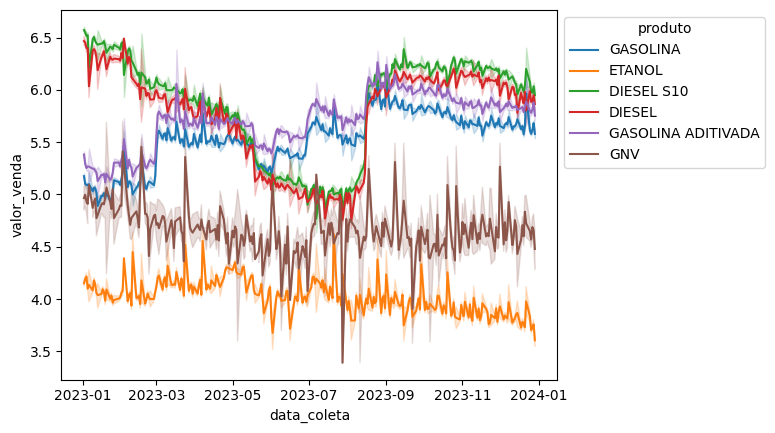

In [32]:
#grafico do produto 
ax = sns.lineplot(data= df_anp, x="data_coleta", y="valor_venda", hue="produto")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

In [33]:
#Separando o dataset por produto
gasolina_aditivada = df_anp.loc[df['produto']=='GASOLINA ADITIVADA']
gasolina = df_anp.loc[df['produto']=='GASOLINA']
diesel_s10 = df_anp.loc[df['produto']=='DIESEL S10']
diesel = df_anp.loc[df['produto']=='DIESEL']
etanol = df_anp.loc[df['produto']=='ETANOL']
gnv = df_anp.loc[df['produto']=='GNV']

In [34]:
#função para plotar, criar grafico
def plotar_boxplot_2V(titulo, labelx, labely, x, y, dataset):
    sns.set_palette('Accent') #cores
    sns.set_style('darkgrid') #fundo
    ax = sns.boxplot(x=x, y= y, data=dataset) #gafico, quando chamar a função tem que colocar o x,y e data
    ax.figure.set_size_inches(12,6) #tamanho
    ax.set_title(titulo, loc = 'left', fontsize = 18) #tirulo
    ax.set_xlabel(labelx, fontsize = 14) #nome eixo X
    ax.set_ylabel(labely, fontsize = 14); #nome eixo Y

In [35]:
def plotar_boxplot_geral(y, dataset):
    ax = sns.boxplot(y=y, data=dataset)
    ax.figure.set_size_inches(4,4)

#### GASOLINA ADITIVADA

In [36]:
gasolina_aditivada.head()

,data_coleta,regiao,estado,municipio,bandeira,produto,valor_venda,ano,mes
6,2023-01-02,SE,SP,SAO JOSE DO RIO PRETO,VIBRA ENERGIA,GASOLINA ADITIVADA,5.14,2023,1
9,2023-01-02,SE,SP,SAO JOSE DO RIO PRETO,RAIZEN,GASOLINA ADITIVADA,5.39,2023,1
21,2023-01-02,SE,SP,SAO JOSE DO RIO PRETO,VIBRA ENERGIA,GASOLINA ADITIVADA,5.09,2023,1
29,2023-01-02,SE,SP,SAO PAULO,VIBRA ENERGIA,GASOLINA ADITIVADA,5.89,2023,1
32,2023-01-02,SE,SP,SAO PAULO,RAIZEN,GASOLINA ADITIVADA,4.69,2023,1


In [37]:
print("Gasolina Aditivada")
gasolina_aditivada.valor_venda.describe().round(2)

Gasolina Aditivada


count    180978.00
mean          5.71
std           0.44
min           3.47
25%           5.39
50%           5.69
75%           5.99
max           9.79
Name: valor_venda, dtype: float64

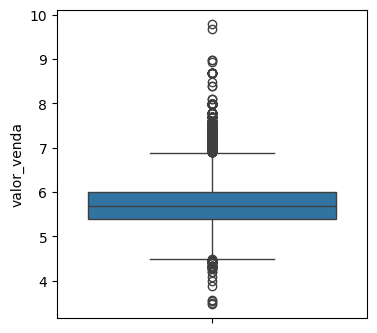

In [38]:
#valor de venda da gasolina aditiva toda
plotar_boxplot_geral("valor_venda", gasolina_aditivada)
#o retangulo a media
#bolinha pra cima max
#bolinha pra baixo min

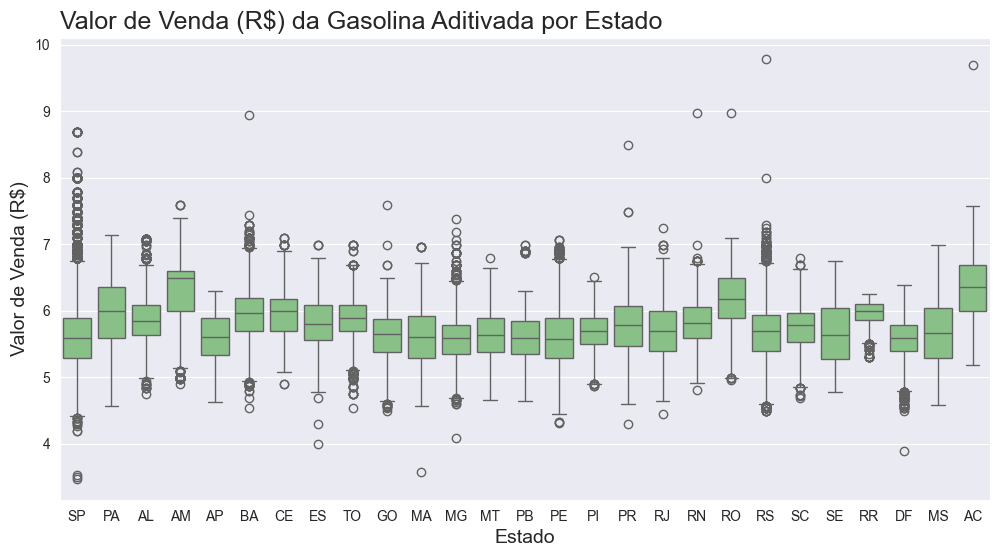

In [39]:
#por estado
plotar_boxplot_2V('Valor de Venda (R$) da Gasolina Aditivada por Estado', #titulo
        'Estado', #labelx
        'Valor de Venda (R$)', #labely
        'estado', #x
        'valor_venda', #y
        gasolina_aditivada) #dataset

#### GASOLINA

In [40]:
gasolina.head()

,data_coleta,regiao,estado,municipio,bandeira,produto,valor_venda,ano,mes
0,2023-01-03,SE,SP,SAO JOSE DO RIO PRETO,RAIZEN,GASOLINA,4.99,2023,1
2,2023-01-02,SE,SP,SAO JOSE DO RIO PRETO,BRANCA,GASOLINA,4.89,2023,1
7,2023-01-02,SE,SP,SAO JOSE DO RIO PRETO,VIBRA ENERGIA,GASOLINA,4.99,2023,1
10,2023-01-02,SE,SP,SAO JOSE DO RIO PRETO,RAIZEN,GASOLINA,4.99,2023,1
14,2023-01-03,SE,SP,SAO JOSE DO RIO PRETO,BRANCA,GASOLINA,4.69,2023,1


In [41]:
print("Gasolina")
gasolina.valor_venda.describe().round(2)

Gasolina


count    232085.00
mean          5.53
std           0.44
min           4.09
25%           5.22
50%           5.49
75%           5.79
max           8.19
Name: valor_venda, dtype: float64

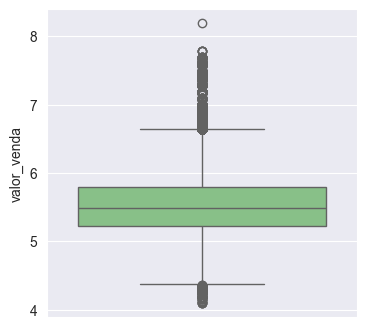

In [42]:
plotar_boxplot_geral("valor_venda", gasolina)

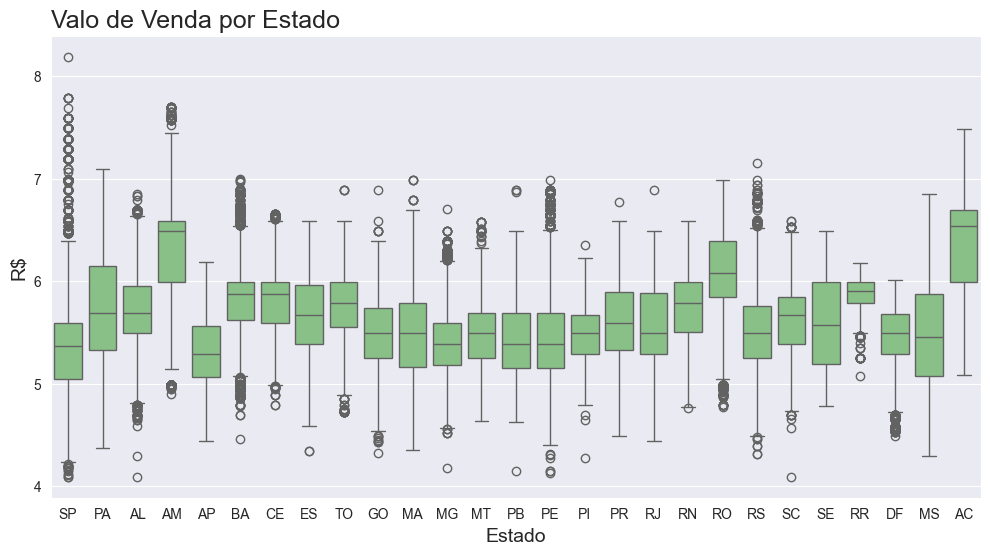

In [43]:
plotar_boxplot_2V("Valo de Venda por Estado", "Estado", "R$", "estado", "valor_venda", gasolina)

#### DIESEL S10

In [44]:
diesel_s10.head()

,data_coleta,regiao,estado,municipio,bandeira,produto,valor_venda,ano,mes
4,2023-01-02,SE,SP,SAO JOSE DO RIO PRETO,VIBRA ENERGIA,DIESEL S10,6.29,2023,1
12,2023-01-03,SE,SP,SAO JOSE DO RIO PRETO,BRANCA,DIESEL S10,6.19,2023,1
16,2023-01-02,SE,SP,SAO JOSE DO RIO PRETO,ALESAT,DIESEL S10,6.39,2023,1
19,2023-01-02,SE,SP,SAO JOSE DO RIO PRETO,VIBRA ENERGIA,DIESEL S10,6.62,2023,1
39,2023-01-04,SE,SP,SAO PAULO,BRANCA,DIESEL S10,5.89,2023,1


In [45]:
diesel_s10.valor_venda.describe().round(2)

count    168461.00
mean          5.86
std           0.61
min           4.19
25%           5.47
50%           5.98
75%           6.28
max           9.00
Name: valor_venda, dtype: float64

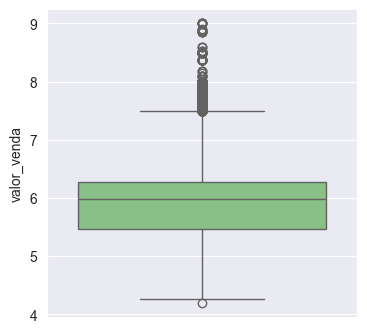

In [46]:
plotar_boxplot_geral("valor_venda", diesel_s10)

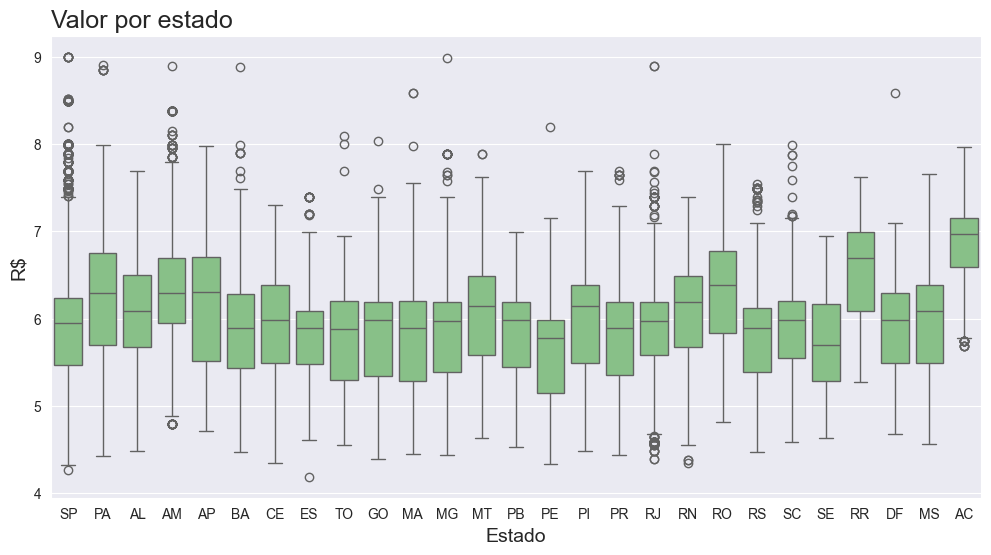

In [47]:
plotar_boxplot_2V("Valor por estado", "Estado", "R$", "estado","valor_venda", diesel_s10)

#### DIESEL

In [48]:
diesel.head()

,data_coleta,regiao,estado,municipio,bandeira,produto,valor_venda,ano,mes
5,2023-01-02,SE,SP,SAO JOSE DO RIO PRETO,VIBRA ENERGIA,DIESEL,6.19,2023,1
13,2023-01-03,SE,SP,SAO JOSE DO RIO PRETO,BRANCA,DIESEL,6.09,2023,1
20,2023-01-02,SE,SP,SAO JOSE DO RIO PRETO,VIBRA ENERGIA,DIESEL,6.52,2023,1
26,2023-01-02,SE,SP,SAO PAULO,BRANCA,DIESEL,5.98,2023,1
35,2023-01-02,SE,SP,SAO PAULO,BRANCA,DIESEL,6.99,2023,1


In [49]:
diesel.valor_venda.describe().round(2)

count    106136.00
mean          5.76
std           0.59
min           3.97
25%           5.38
50%           5.85
75%           6.14
max           7.99
Name: valor_venda, dtype: float64

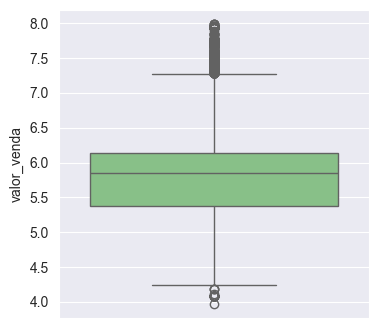

In [50]:
plotar_boxplot_geral("valor_venda", diesel)

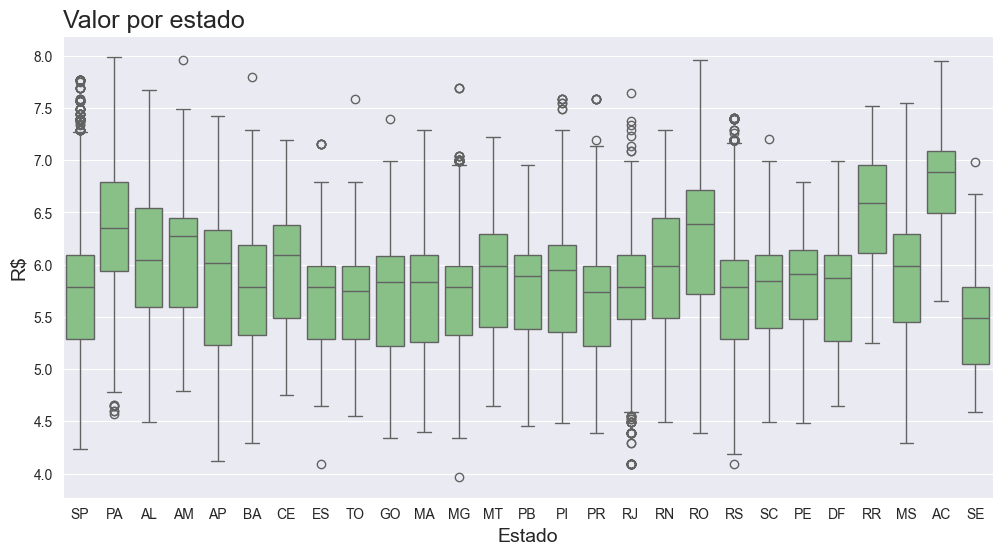

In [51]:
plotar_boxplot_2V("Valor por estado", "Estado", "R$", "estado","valor_venda", diesel)

#### ETANOL

In [52]:
etanol.head()

,data_coleta,regiao,estado,municipio,bandeira,produto,valor_venda,ano,mes
1,2023-01-02,SE,SP,SAO JOSE DO RIO PRETO,BRANCA,ETANOL,3.69,2023,1
3,2023-01-02,SE,SP,SAO JOSE DO RIO PRETO,VIBRA ENERGIA,ETANOL,3.69,2023,1
8,2023-01-02,SE,SP,SAO JOSE DO RIO PRETO,RAIZEN,ETANOL,3.69,2023,1
11,2023-01-03,SE,SP,SAO JOSE DO RIO PRETO,BRANCA,ETANOL,3.54,2023,1
15,2023-01-02,SE,SP,SAO JOSE DO RIO PRETO,ALESAT,ETANOL,3.69,2023,1


In [53]:
etanol.valor_venda.describe().round(2)

count    197849.00
mean          4.00
std           0.52
min           2.69
25%           3.59
50%           3.98
75%           4.38
max           6.96
Name: valor_venda, dtype: float64

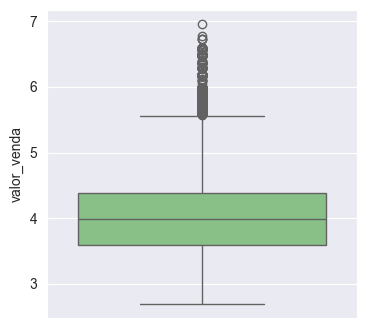

In [54]:
plotar_boxplot_geral("valor_venda", etanol)

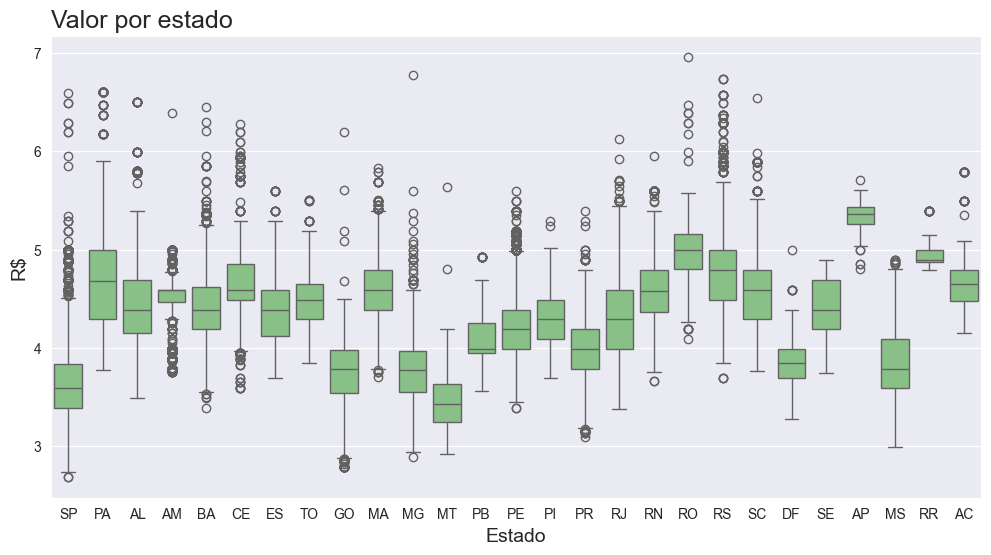

In [55]:
plotar_boxplot_2V("Valor por estado", "Estado", "R$", "estado","valor_venda", etanol)

#### GNV

In [56]:
gnv.head()

,data_coleta,regiao,estado,municipio,bandeira,produto,valor_venda,ano,mes
97,2023-01-02,SE,SP,SAO PAULO,BRANCA,GNV,4.45,2023,1
106,2023-01-02,SE,SP,SAO PAULO,VIBRA ENERGIA,GNV,4.89,2023,1
130,2023-01-03,SE,SP,SAO PAULO,VIBRA ENERGIA,GNV,4.99,2023,1
135,2023-01-02,SE,SP,SAO PAULO,VIBRA ENERGIA,GNV,5.29,2023,1
196,2023-01-03,SE,SP,SAO PAULO,BRANCA,GNV,4.99,2023,1


In [57]:
gnv.valor_venda.describe().round(2)

count    18491.00
mean         4.64
std          0.57
min          2.39
25%          4.27
50%          4.59
75%          4.99
max          6.71
Name: valor_venda, dtype: float64

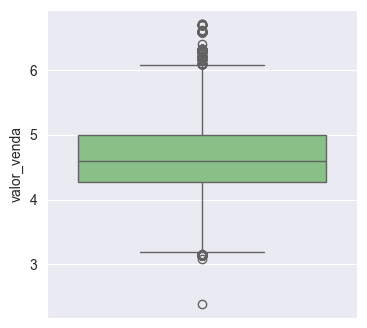

In [58]:
plotar_boxplot_geral("valor_venda", gnv)

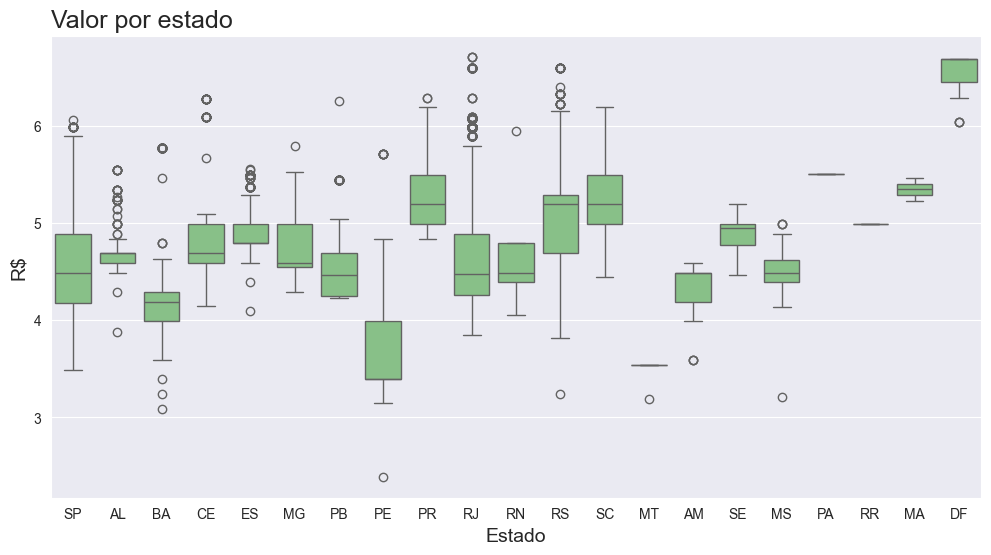

In [59]:
plotar_boxplot_2V("Valor por estado", "Estado", "R$", "estado","valor_venda", gnv)

Quantidade de Bandeiras distribuidoras de combustível


In [60]:
df_anp.head()

,data_coleta,regiao,estado,municipio,bandeira,produto,valor_venda,ano,mes
0,2023-01-03,SE,SP,SAO JOSE DO RIO PRETO,RAIZEN,GASOLINA,4.99,2023,1
1,2023-01-02,SE,SP,SAO JOSE DO RIO PRETO,BRANCA,ETANOL,3.69,2023,1
2,2023-01-02,SE,SP,SAO JOSE DO RIO PRETO,BRANCA,GASOLINA,4.89,2023,1
3,2023-01-02,SE,SP,SAO JOSE DO RIO PRETO,VIBRA ENERGIA,ETANOL,3.69,2023,1
4,2023-01-02,SE,SP,SAO JOSE DO RIO PRETO,VIBRA ENERGIA,DIESEL S10,6.29,2023,1


In [61]:
#quantidade de bandeira
df_anp['bandeira'].nunique()

48

In [62]:
#bandeira existentes
df_anp['bandeira'].unique()

array(['RAIZEN', 'BRANCA', 'VIBRA ENERGIA', 'ALESAT', 'IPIRANGA',
       'TOTALENERGIES', 'PETROBRASIL', 'SABBÁ', 'EQUADOR', "ATEM' S",
       'SP', 'FAN', 'CIAPETRO', 'CHARRUA', 'STANG', 'RODOIL', 'MAXSUL',
       'RAIZEN MIME', 'POTENCIAL', 'DIBRAPE', 'MASUT DISTRIBUIDORA',
       'IDAZA', 'ON PETRO', 'AMERICANOIL', 'ATLÂNTICA', 'RIO BRANCO',
       'PELIKANO', 'DISLUB', 'PETROX DISTRIBUIDORA', 'SIMARELLI',
       'TDC DISTRIBUIDORA', 'TAURUS', 'ROYAL FIC', 'UNI', 'REJAILE',
       'D`MAIS', 'PETROBAHIA', 'LARCO', 'SUL COMBUSTÍVEIS',
       'FEDERAL ENERGIA', 'ESTRADA', 'TEMAPE', 'WALENDOWSKY',
       'SETTA DISTRIBUIDORA', 'TORRAO', 'AIR BP', 'VIBRA',
       'RZD DISTRIBUIDORA'], dtype=object)

In [63]:
bandeiras_estado = df_anp_bandeira_estado.groupby('estado').bandeira.nunique().reset_index() #quantidade de bandeira por estado

In [64]:
bandeiras_estado.head()

,estado,bandeira
0,AC,7
1,AL,7
2,AM,9
3,AP,4
4,BA,9


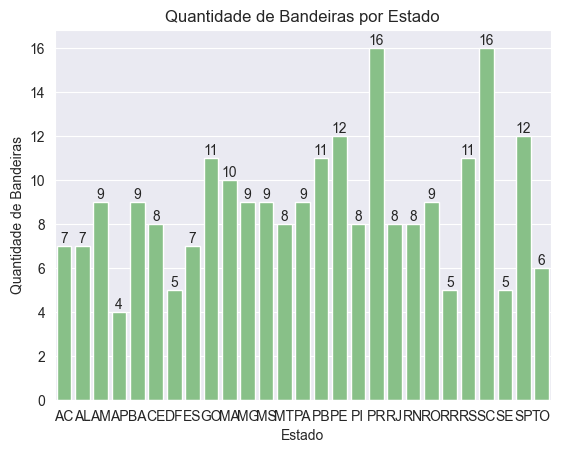

In [65]:
sns.barplot(x='estado', y='bandeira', data=bandeiras_estado)

plt.title('Quantidade de Bandeiras por Estado')
plt.xlabel('Estado')
plt.ylabel('Quantidade de Bandeiras')

for index, row in bandeiras_estado.iterrows():
    plt.annotate(row['bandeira'], xy=(index, row['bandeira']), ha='center', va='bottom')

plt.show()

### Aula 5 - Dashboards e storytelling

In [66]:
#POWER BI